## Классификация методом k ближайших соседей и набор данных Digits

будет рассмотрена задача классификации в области машинного обучения с учителем, где требуется спрогнозировать класс, к которому относится образец.

Воспользуемся набором данных Digits2, входящим в поставку scikit-learn. Набор состоит из изображений 8 × 8 пикселов и представляет 1797 рукописных цифр (от 0 до 9). Требуется определить, какую цифру представляет изображение.

Основные этапы реализации машинного обучения:

- Выбор данных для обучения модели.

- Загрузка и анализ данных.

- Разбиение данных для обучения и тестирования.

- Выбор и построение модели.

- Обучение модели.

- Формирование прогнозов.

KNN алгоритм пытается спрогнозировать класс тестового образца, анализируя k обучающих образцов, расположенных ближе всего (по расстоянию) к тестовому образцу.

### Загрузка набора данных

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

### Проверка атрибутов data и target

Атрибуты data и target объекта Bunch представляют собой массивы NumPy:

   - Массив data содержит 1797 образца (изображения цифр), каждый из которых несет 64 признака со значениями в диапазоне 0–16, представляющие интенсивности пикселов.
    
   - Массив target содержит метки изображений, то есть классы, указывающие, какую цифру представляет каждое изображение.

In [3]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

### Пример изображения цифры

Все изображения двумерны — они обладают шириной и высотой в пикселах.

Объект Bunch, возвращаемый load_digits, содержит атрибут images — массив, каждый элемент которого представляет собой двумерный массив 8 × 8 с интенсивностями пикселов изображения цифры.

In [6]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

### Подготовка данных для использования со scikit-learn

Алгоритмы машинного обучения scikit-learn требуют, чтобы образцы хранились в двумерном массиве значений с плавающей точкой (или коллекции, сходной с двумерным массивом, например списком списков или коллекцией pandas DataFrame):
- каждая строка представляет один образец;
- каждый столбец заданной строки представляет один признак этого образца.

Для представления каждого образца в виде одной строки данных многомерные данные (например, двумерный массив image из фрагмента) должны быть преобразованы в одномерный массив.

Если вы работаете с данными, содержащими категорийные признаки (обычно представленные в виде строк — скажем, 'spam' и 'not-spam'), то вам также придется провести предварительную обработку этих признаков и преобразовать их в числовые значения

In [7]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

### Визуализация данных

In [8]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


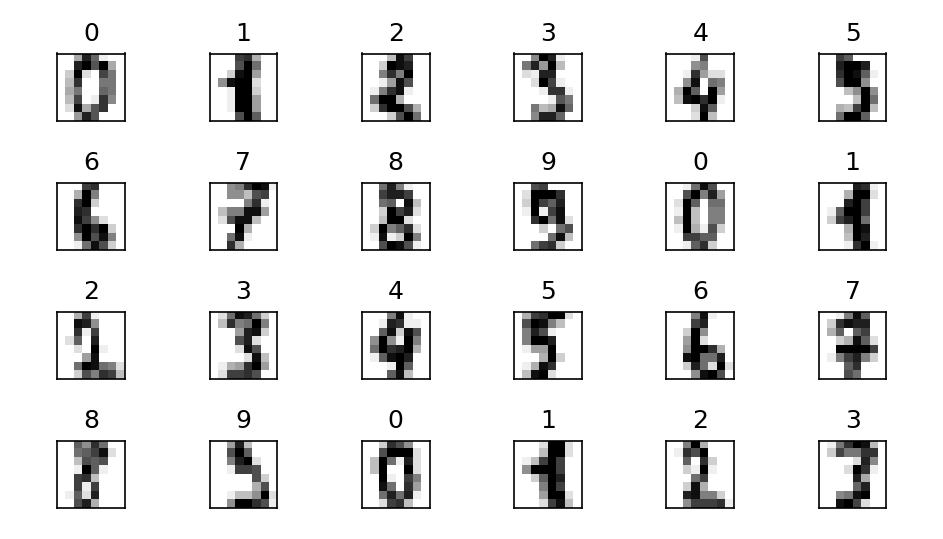

In [48]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [49]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # Удаление делений на оси x
    axes.set_yticks([]) # Удаление делений на оси y
    axes.set_title(target)
plt.tight_layout()

### Разбиение данных для обучения и тестирования

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

### Размеры обучающего и тестового наборов

In [13]:
X_train.shape

(1347, 64)

In [14]:
X_test.shape

(450, 64)

### Создание модели

Оценщик KNeighborsClassifier (модуль sklearn.neighbors) реализует алгоритм k ближайших соседей. Сначала создается объект оценщика KNeighborsClassifier:

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

### Обучение модели

In [17]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

### Прогнозирование классов для рукописных цифр
Итак, после загрузки данных в KNeighborsClassifier эти данные могут использоваться с тестовыми образцами для построения прогнозов.

При вызове метода predict оценщика с передачей X_test в аргументе возвращает массив,
содержащий прогнозируемый класс каждого тестового изображения:

In [18]:
predicted = knn.predict(X=X_test)

In [19]:
expected = y_test

In [20]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [21]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

Как видим, среди первых 20 элементов массивов predicted и expected не совпадают только значения с индексом 18. Здесь ожидалась цифра 3, но модель предсказала 5.

Воспользуемся трансформацией списка для нахождения всех ошибочных прогнозов для всего тестового набора, то есть тех случаев, в которых значения из массивов predicted и expected не совпадают:

In [22]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [23]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

### Метрики точности модели
После того как модель пройдет обучение и тестирование, желательно оценить ее точность.

#### Метод score оценщика

In [24]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


#### Матрица несоответствий

In [25]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

Правильные прогнозы находятся на главной диагонали, проходящей от левого верхнего до правого нижнего угла. Ненулевые значения, не находящиеся на главной диагонали, обозначают ошибочные прогнозы:

In [26]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

Каждая строка представляет один класс, то есть одну из цифр от 0 до 9.

Теперь возьмем строку 8, представляющую результат для цифры 8:
[ 0, 1, 1, 2, 0, 0, 0, 0, 39, 1]
- 1 в столбце с индексом 1 означает, что одна цифра 8 была неправильно
классифицирована как 1.
- 1 в столбце с индексом 2 означает, что одна цифра 8 была неправильно
классифицирована как 2.
- 2 в столбце с индексом 3 означает, что две цифры 8 были неправильно
классифицированы как 3.
- 39 в столбце с индексом 8 означает, что 39 цифр 8 были правильно классифицированы как 8.
- 1 в столбце с индексом 9 означает, что одна цифра 8 была неправильно
классифицирована как 9.

#### Отчет по классификации

In [27]:
from sklearn.metrics import classification_report

In [28]:
names = [str(digit) for digit in digits.target_names]

In [29]:
print(classification_report(expected, predicted,
target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



В этом отчете:
- precision — точность, то есть общее количество точных прогнозов для заданной цифры, разделенное на общее количество прогнозов для этой цифры. 
- recall — отклик, то есть общее количество правильных прогнозов для заданной цифры, разделенное на общее количество образцов, которые должны были прогнозироваться как эта цифра.
- f1-score — среднее значение точности и отклика;
- support — количество образцов с заданным ожидаемым значением.

#### Визуализация матрицы несоответствий

In [30]:
import pandas as pd

In [31]:
confusion_df = pd.DataFrame(confusion, index=range(10),
columns=range(10))

In [32]:
import seaborn as sns

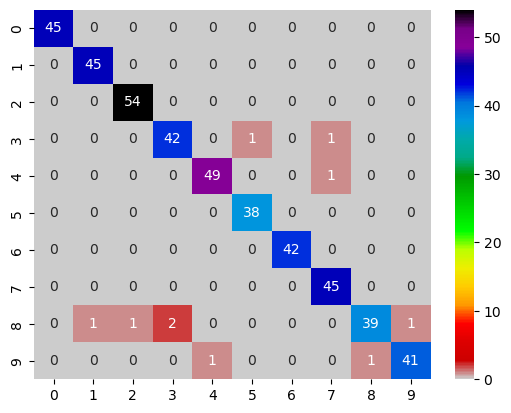

In [33]:
axes = sns.heatmap(confusion_df, annot=True,
cmap='nipy_spectral_r')

### K-проходная перекрестная проверка

K-проходная перекрестная проверка позволяет использовать все данные как для обучения, так и для тестирования. Повторное обучение и тестирование модели с разными частями набора данных помогают лучше понять, как модель справляется с прогнозированием для новых данных. Набор данных разбивается на k частей равного размера

- Сначала выполняется обучение на частях 1–9, а затем тестирование с частью 10.
- Затем выполняется обучение на частях 1–8 и 10, а затем тестирование с частью 9.
- Затем выполняется обучение на частях 1–7 и 9–10, а затем тестирование с частью 8.

Цикл обучения и тестирования продолжается до тех пор, пока каждая часть не будет использована для тестирования модели.

In [34]:
from sklearn.model_selection import KFold

In [35]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [36]:
# n_splits=10 - колво частей
# shuffle=True - перемешивание данных перед разбиением

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(estimator=knn, X=digits.data,
                         y=digits.target, cv=kfold)

# estimator=knn — оценщик, который вы хотите проверить;
# X=digits.data — образцы, используемые для обучения и тестирования;
# y=digits.target — прогнозы целевых значений для образцов;

# cv=kfold — генератор перекрестной проверки, определяющий способ 
#разбиения образцов и целевых значений для обучения и тестирования.

In [39]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [40]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [41]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


В среднем модель обеспечивала точность 98,72%, то есть даже больше, чем в предыдущем варианте, когда 75% данных использовалось для обучения, а 25% — для тестирования.

### Выполнение нескольких моделей для поиска наилучшей

In [42]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [43]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [44]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


Судя по результатам, оценщик SVC обеспечивает лучшую точность — по
крайней мере, с настройками по умолчанию. Возможно, настройка некоторых
параметров позволит добиться еще более точных результатов.
Точности оценщиков KNeighborsClassifier и SVC почти идентичны, поэтому
стоит провести настройку гиперпараметров каждого оценщика для выбора
лучшего варианта.

### Настройка гиперпараметров

Гиперпараметры задаются до того, как
алгоритм начнет использоваться для обучения модели. В реальных исследова
ниях в процессе настройки гиперпараметров должны быть выбраны значения
гиперпараметров, которые обеспечивают лучшие возможные прогнозы.

In [46]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
